## 1. Heart rate estimation from a smartwatch-derived PPG signal during exercise

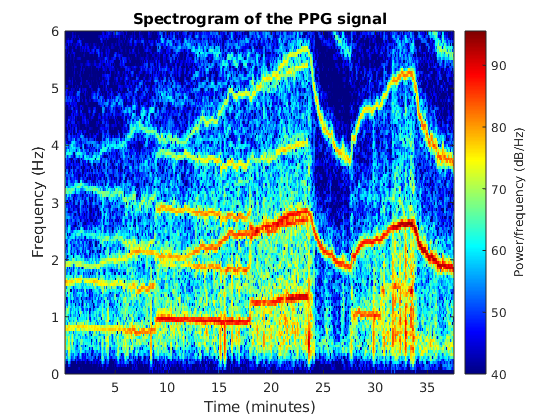

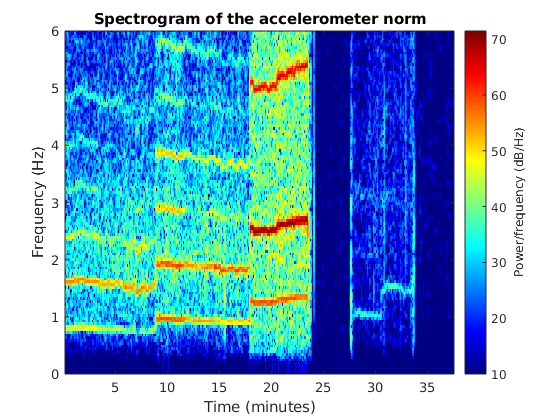

In [2]:
clear;
close all;
clc;

%% Load the raw data
load('ppg_acc.mat');

%% Baseline attenuation: Highpass filter on the PPG and accelerometer signals
% For the PPG signal we do not want to filter out the heart rate. Considering
% a minimal physiological heart rate of 30 bpm (0.5 Hz), we can use a highpass
% filter at 0.5 Hz. For the accelerometer norm signal, we do not want to filter
% out the frequencies of rhythmic motion. Considering a very slow walking pace
% of 1 step/s (1 Hz), the frequency of the arm swinging movement is half of 
% that frequency, i.e. 0.5 Hz, and therefore we can use the same filter as for
% the PPG signal.
fs = 25;
[b,a] = butter(2, 0.5/(fs/2), 'high');
ppg = filtfilt(b, a, ppg);
accn = filtfilt(b, a, accn);

%% Spectrogram of the PPG & accelerometer norm signals
% When running, or when suddenly stopping an intense exercise, the heart rate
% can change quite fast in matter of a few seconds. A window of 10 seconds 
% would be short enough at all times to consider the signal stationary in the
% window. However, a slightly longer window, e.g. 20 seconds, will also be fine
% the vast majority of the time, with the advantage of improving the frequency
% resolution of our spectrogram. It is therefore a good choice.
window = round(20*fs);          % Windows of 20 seconds
noverlap = round(0.95*20*fs);   % Overlap of 95%

figure('Units','centimeters','Position',[0,0,25,11],'Color','w');
spectrogram(ppg, window, noverlap, [], fs, 'yaxis');
ylim([0,6]);
colormap('jet');
set(gca, 'clim', [40, max(get(gca, 'clim'))]);
title('Spectrogram of the PPG signal');

figure('Units','centimeters','Position',[5,5,25,11],'Color','w');
spectrogram(accn, window, noverlap, [], fs, 'yaxis');
ylim([0,6]);
colormap('jet');
set(gca, 'clim', [10, max(get(gca, 'clim'))]);
title('Spectrogram of the accelerometer norm');

Question 1 : 

The walk occured during 0 to around 9 minutes, the slow pace run during 9 to 18 minutes, the fast pace run during 18 to 24 minutes, the first rest during 24 to 27 minutes, the slow pace bike during 27 to 31 minutes, the fast pace bike during 31 to 34 minutes and the second recovery from 34 minutes to the end of the recording.

![spectograMacc](figure.jpg)

Question 2 : 

The minimal heart rate should be around 2Hz and the maximal around 3Hz.

Question 3 :

While biking, the hand movement is very low and induces lower power/frequency than running or walking. The biking sessions, thus, correspond to the part of the spectrogram where the power/frequency is hardly distinguishable (~30dB/Hz) but not nonexistent.  

Question 4 : 

In the beginning of the fast running section, the heart rate frequency overlaps with the motion related components' second harmonic, making it hard to distinguish one from the other. Trying to cancel the motion noise from the PPG signal could lead to the loss of the heart rate information. 

Question 5 :

As we seem to have an arm swinging frequency around 0.8Hz, the subject was walking 1.6Hz (96 steps per minute). 

## 2: Sympathovagal balance estimation from blood pressure variability during sleep

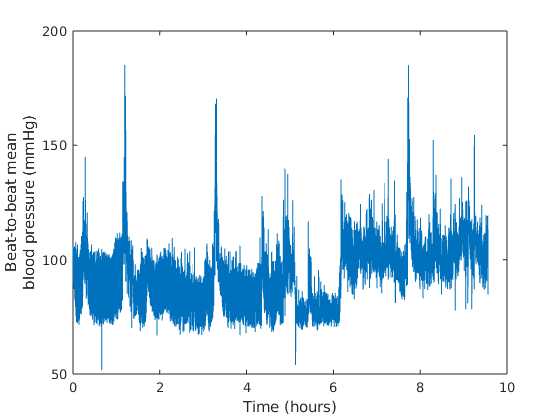

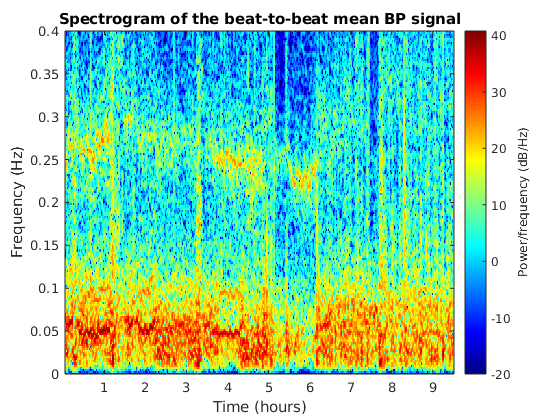

In [3]:
clear;
close all;
clc;

%% Load the raw data
load('bp.mat');

%% Plot the raw time signal
fs = 20;
t = (0:length(bp)-1)'/fs;
figure('Units','centimeters','Position',[0,0,25,11],'Color','w');
plot(t/3600, bp);
xlabel('Time (hours)');
ylabel({'Beat-to-beat mean','blood pressure (mmHg)'});

%% Baseline attenuation: Highpass filter on the BP signal 
% The lower limit of the LF range is 0.04 Hz. With a cut-off frequency at 0.01
% Hz, one can check (with the freqz function for instance) that we do not 
% attenuate significantly any frequency component >= 0.04 Hz. Therefore, 0.01 
% Hz is a good trade-off between effective baseline cancellation and 
% preservation of the frequency bands of interest.
[b,a] = butter(2, 0.01/(fs/2), 'high');
bp_filt = filtfilt(b, a, bp);

%% Spectrogram of the BP signal
% Adjust the window duration below to a better value and explain your choice.
winduration = 300;    % Window duration in seconds: Find a better suited value
window = round(winduration*fs);   
noverlap = round(0.95*winduration*fs);  % Overlap of 95%

figure('Units','centimeters','Position',[0,0,30,11],'Color','w');
spectrogram(bp_filt, window, noverlap, [], fs, 'yaxis');
ylim([0,0.4]);
colormap('jet');
title('Spectrogram of the beat-to-beat mean BP signal');

% Adjust the lower limit of the colormap to a better value to improve the 
% readability of the spectrogram.
cmaplowlim = -20; % Lower colormap limit: Find a better value
set(gca, 'clim', [cmaplowlim, max(get(gca, 'clim'))]);


Question 1 :

 We choose 25s because it is the period of the lowest frequency in the signal (1/0.04 = 25). 


Question 2 : 

As most of the color we see is red/orange and there are a few yellowish tones, we put the lower value to -20. 


Question 3 : 

At 2 hours, the LF-to-HF ratio is the higher. At 6 hours, the LF-to-HF ratio is the lower. At 4 hours, it is between the two previous ones. 




Question 4 : 

Yes, we could have concluded the same from the time signal however this way would be much more tedious than and less evident. Indeed in order to observe this we had to zoom in the time signal and 



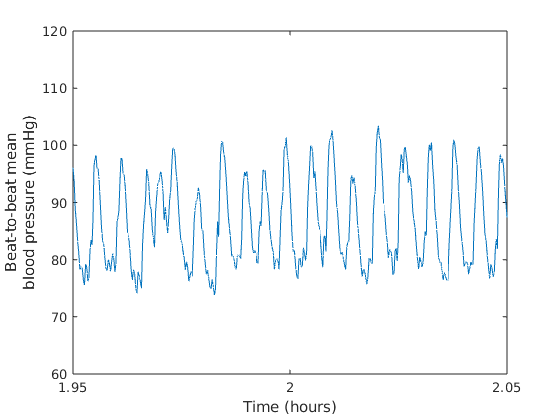

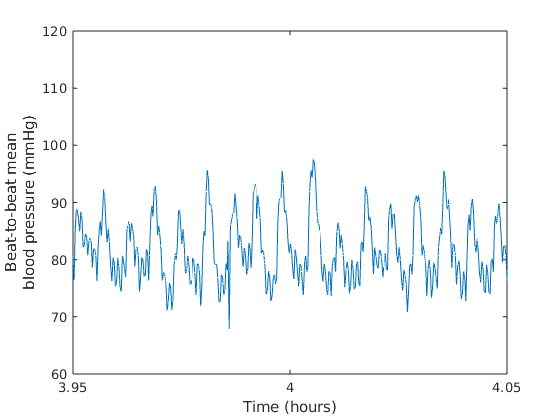

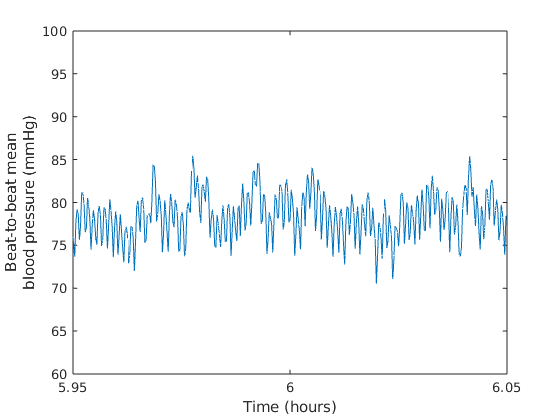

In [4]:
figure('Units','centimeters','Position',[0,0,25,11],'Color','w');
plot(t/3600, bp);
xlabel('Time (hours)');
ylabel({'Beat-to-beat mean','blood pressure (mmHg)'});
xlim([1.95 2.05])
ylim([60 120])

figure('Units','centimeters','Position',[0,0,25,11],'Color','w');
plot(t/3600, bp);
xlabel('Time (hours)');
ylabel({'Beat-to-beat mean','blood pressure (mmHg)'});
xlim([3.95 4.05])
ylim([60 120])

figure('Units','centimeters','Position',[0,0,25,11],'Color','w');
plot(t/3600, bp);
xlabel('Time (hours)');
ylabel({'Beat-to-beat mean','blood pressure (mmHg)'});
xlim([5.95 6.05])
ylim([60 100])

## 3: Respiration signal of a patient suffering from sleep apnea  

Question 1 : 

The ideal value is the apnea time period (assuming it is bigger than the ventilation period). The minimal value is around 10s (60/8 = 10) and the maximal value is, as said before, 20s. 